Saving Gemini_Generated_Image_kyjqvekyjqvekyjq.png to Gemini_Generated_Image_kyjqvekyjqvekyjq (1).png

Processing image: Gemini_Generated_Image_kyjqvekyjqvekyjq (1).png


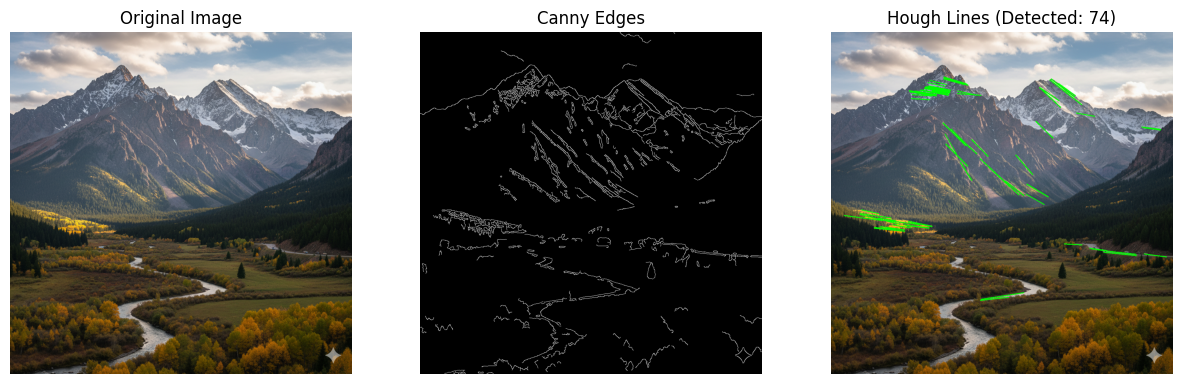

✅ Number of lines detected: 74
✔️ The Hough Transform worked — lines were successfully found.
   Adjust parameters if too many/few lines appear.


In [2]:
# ============================================
# Count Lines using Hough Transform Line Finder
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Upload your iris (or any) image
uploaded = files.upload()

# 2️⃣ Process each uploaded image
for fname in uploaded.keys():
    print(f"\nProcessing image: {fname}")

    # Read the image
    img = cv2.imread(fname)
    if img is None:
        print("⚠️ Could not load image, skipping.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.5)

    # 3️⃣ Detect edges with Canny
    edges = cv2.Canny(blurred, 50, 150)

    # 4️⃣ Detect lines using Hough Transform
    lines = cv2.HoughLinesP(
        edges,
        rho=1,
        theta=np.pi / 180,
        threshold=80,        # accumulator threshold (lower -> more lines)
        minLineLength=50,    # minimum line length in pixels
        maxLineGap=10        # maximum gap between line segments
    )

    # 5️⃣ Draw lines and count them
    line_img = img.copy()
    line_count = 0
    if lines is not None:
        line_count = len(lines)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    else:
        print("⚠️ No lines detected.")

    # 6️⃣ Display results
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Hough Lines (Detected: {line_count})')
    plt.axis('off')

    plt.show()

    # 7️⃣ Print the line count for evaluation
    print(f"✅ Number of lines detected: {line_count}")

    # 8️⃣ Optional: qualitative assessment
    if line_count > 0:
        print("✔️ The Hough Transform worked — lines were successfully found.")
        print("   Adjust parameters if too many/few lines appear.")
    else:
        print("❌ The algorithm didn’t find clear lines — try lowering thresholds or blurring more.")

# ✅ End of script
